In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

%matplotlib inline

In [58]:
columns = ['Sepal Length', 'Sepal Width', 'Pedal Length', 'Pedal Width', 'Class_labels']
df = pd.read_csv('iris.data', names=columns)
df.head()

,Sepal Length,Sepal Width,Pedal Length,Pedal Width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df.describe()

,Sepal Length,Sepal Width,Pedal Length,Pedal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


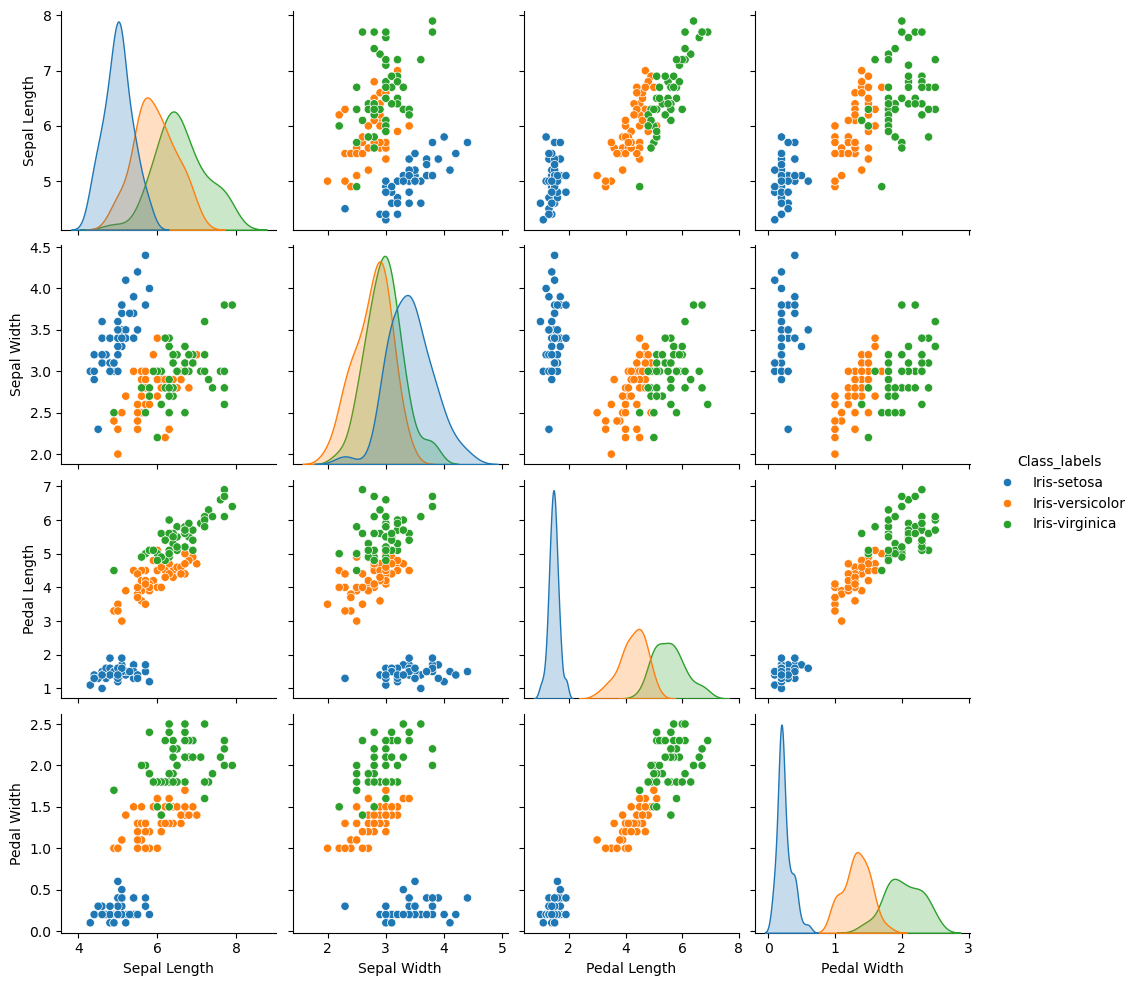

In [60]:
sns.pairplot(df, hue='Class_labels')
plt.show()

We can infer that the iris-setosa is seperated from the other flowers. Another thing was can infer is that iris-virginica is the longest flower and iris setosa is the shortest. 

In [61]:
data = df.values
X = data[:,0:4]
y = data[:,4]

Then we seperate the features from our target value.

In [62]:
y_Data = np.array([np.average(X[:,i][y==j].astype('float32')) for i in range(X.shape[1])
                   for j in (np.unique(y))])
print(y_Data)
y_Data_reshaped = y_Data.reshape(4, 3)
y_Data_reshaped = np.swapaxes(y_Data_reshaped, 0, 1)
print(y_Data_reshaped)
x_axis = np.arange(len(columns)-1)
width = 0.25

[5.006     5.9360003 6.5880003 3.418     2.7700002 2.974     1.4640001
 4.26      5.552     0.244     1.3260001 2.026    ]
[[5.006     3.418     1.4640001 0.244    ]
 [5.9360003 2.7700002 4.26      1.3260001]
 [6.5880003 2.974     5.552     2.026    ]]


since y_data is a 1-D array, and we have 4 features for 3 classes, we have to reshape it to (4,3). Then we change the axis.

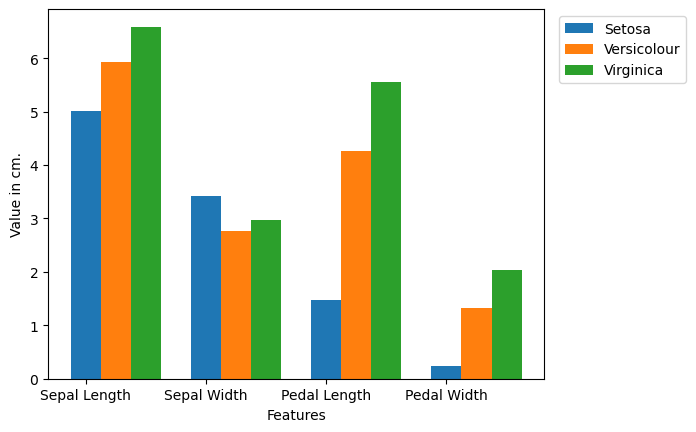

In [63]:
plt.bar(x_axis, y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(x_axis+width, y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(x_axis+width*2, y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(x_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

Here we can see that it's true that Virgincia is the longest and Setosa is the shortest.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
svn = SVC()
svn.fit(X_train, y_train)

SVC()

Here we use the support vector classifier from scikit-learn support vector machine. The we fit the trained values into the algorithm.

In [66]:
predictions = svn.predict(X_test)
accuracy_score(y_test, predictions)

0.9666666666666667

We predict the classes from the test dataset using the trained model that we have. THen we check the score which is a percentage.

In [67]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



Precision: ratio of true positives to the sum of true positives and false positives
Recall: ratio of true positives to the sum of true positive and false negative
F1-Score: mean of precision and recall value
Support: number of actual occurrences of the class in the dataset

In [68]:
X_rand = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.9, 1.1], [5.3, 2.5,4.6,1.9]])
prediction = svn.predict(X_rand)
print("Prediction of Specifes: {}".format(prediction))

Prediction of Specifes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [69]:
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_rand)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)